<div style="text-align: center;">
    <h1 style="font-size: 48px;">Chocolate Rating - A Regression Problem</h1>
</div>

![Project 6 - Chocolate Rating](Chocolate_Rating.jpg)

In [1]:
import pandas as pd
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2000)

# Load information

In [2]:
chocolate = pd.read_csv("C:/Users/Usuario/Desktop/Machine Learning with Python/Repositorio de Projectos/Project 6 - Chocolate Rating/Raúl Reaño Araya - chocolate_ratings.csv")
chocolate.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
chocolate.shape

(2530, 10)

In [4]:
chocolate.duplicated().sum() 

0

In [5]:
chocolate.dtypes

REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                        object
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object

In [6]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2530 non-null   int64  
 1   Company (Manufacturer)            2530 non-null   object 
 2   Company Location                  2530 non-null   object 
 3   Review Date                       2530 non-null   int64  
 4   Country of Bean Origin            2530 non-null   object 
 5   Specific Bean Origin or Bar Name  2530 non-null   object 
 6   Cocoa Percent                     2530 non-null   object 
 7   Ingredients                       2443 non-null   object 
 8   Most Memorable Characteristics    2530 non-null   object 
 9   Rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


# Data Cleaning

### Finding null values (values = NaN)

In [7]:
chocolate.isnull().mean()

REF                                 0.000000
Company (Manufacturer)              0.000000
Company Location                    0.000000
Review Date                         0.000000
Country of Bean Origin              0.000000
Specific Bean Origin or Bar Name    0.000000
Cocoa Percent                       0.000000
Ingredients                         0.034387
Most Memorable Characteristics      0.000000
Rating                              0.000000
dtype: float64

In [8]:
chocolate = chocolate.dropna()

In [9]:
chocolate.shape

(2443, 10)

In [10]:
chocolate.describe().round(3)

,REF,Review Date,Rating
count,2443.000,2443.000,2443.000
mean,1451.520,2014.486,3.210
std,755.522,3.958,0.428
min,5.000,2006.000,1.000
25%,833.000,2012.000,3.000
50%,1474.000,2015.000,3.250
75%,2100.000,2018.000,3.500
max,2712.000,2021.000,4.000


### Finding missing values (values = 0)

In [11]:
chocolate = chocolate.drop(['REF'], axis=1)

In [12]:
(chocolate==0).sum()/(chocolate==0).count()*100

Company (Manufacturer)              0.0
Company Location                    0.0
Review Date                         0.0
Country of Bean Origin              0.0
Specific Bean Origin or Bar Name    0.0
Cocoa Percent                       0.0
Ingredients                         0.0
Most Memorable Characteristics      0.0
Rating                              0.0
dtype: float64

In [13]:
cat_features = ["Company (Manufacturer)","Company Location","Country of Bean Origin","Specific Bean Origin or Bar Name",
                "Cocoa Percent","Ingredients","Most Memorable Characteristics"]

# EDA

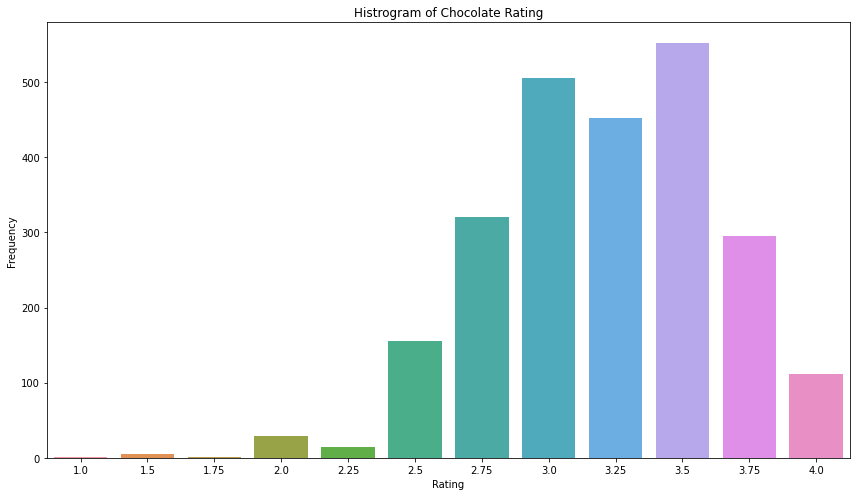

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x=chocolate["Rating"])
plt.title('Histrogram of Chocolate Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
# Show the visualization
plt.tight_layout()
plt.show();

In [15]:
for col in chocolate.select_dtypes(include=['O']).columns:
    print(f"{col}: {chocolate[col].nunique()} valores únicos")

Company (Manufacturer): 542 valores únicos
Company Location: 67 valores únicos
Country of Bean Origin: 62 valores únicos
Specific Bean Origin or Bar Name: 1567 valores únicos
Cocoa Percent: 46 valores únicos
Ingredients: 21 valores únicos
Most Memorable Characteristics: 2403 valores únicos


                                         count  percent
Company (Manufacturer)                                 
Soma                                        56      2.3
Fresco                                      39      1.6
Arete                                       32      1.3
Bonnat                                      29      1.2
A. Morin                                    26      1.1
Dandelion                                   25      1.0
Pralus                                      25      1.0
Valrhona                                    22      0.9
Domori                                      22      0.9
Guittard                                    22      0.9
Zotter                                      21      0.9
Castronovo                                  19      0.8
Dick Taylor                                 19      0.8
Mast Brothers                               18      0.7
Coppeneur                                   18      0.7
Duffy's                                     17  

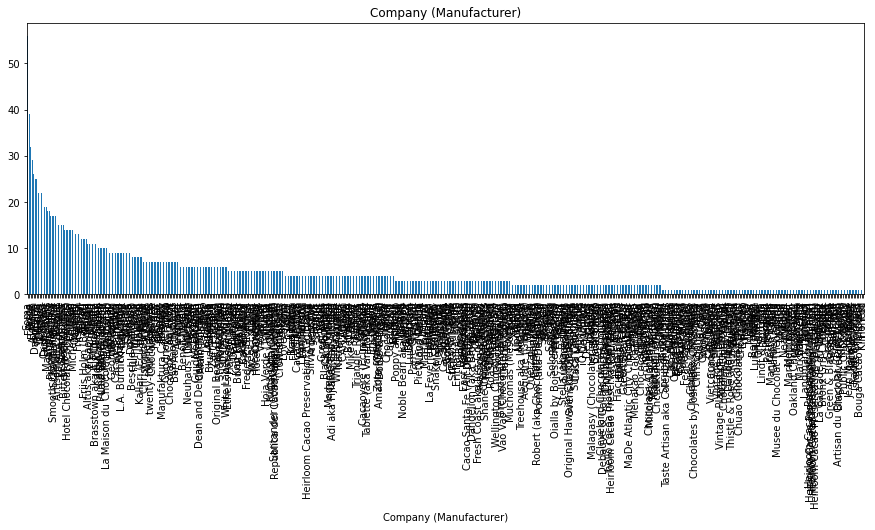

In [16]:
plt.figure(figsize=(15, 5))
feature = cat_features[0]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

                       count  percent
Company Location                     
U.S.A.                  1118     45.8
Canada                   174      7.1
France                   168      6.9
U.K.                     124      5.1
Italy                     72      2.9
Belgium                   60      2.5
Australia                 51      2.1
Ecuador                   51      2.1
Switzerland               44      1.8
Germany                   39      1.6
Spain                     35      1.4
Denmark                   31      1.3
Venezuela                 31      1.3
Austria                   30      1.2
Colombia                  28      1.1
Hungary                   26      1.1
New Zealand               26      1.1
Japan                     26      1.1
Brazil                    24      1.0
Peru                      20      0.8
Vietnam                   16      0.7
Singapore                 15      0.6
Madagascar                13      0.5
Amsterdam                 12      0.5
Scotland    

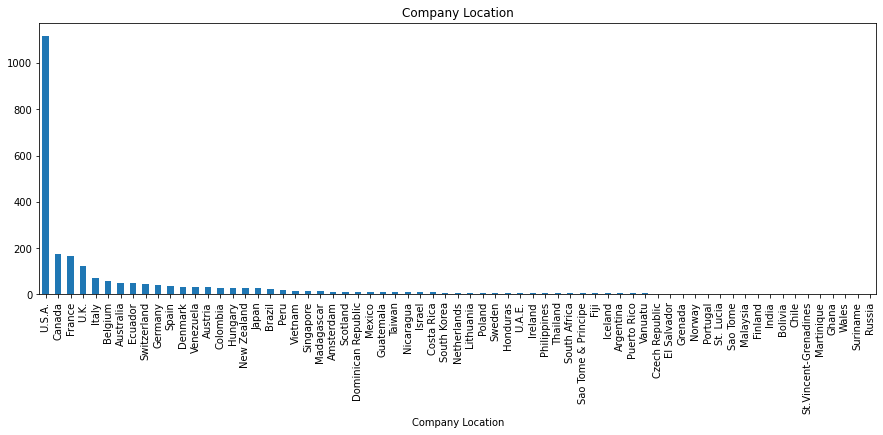

In [17]:
plt.figure(figsize=(15, 5))
feature = cat_features[1]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

                        count  percent
Country of Bean Origin                
Venezuela                 246     10.1
Peru                      231      9.5
Dominican Republic        220      9.0
Ecuador                   201      8.2
Madagascar                171      7.0
Blend                     144      5.9
Nicaragua                 100      4.1
Bolivia                    79      3.2
Colombia                   78      3.2
Tanzania                   78      3.2
Brazil                     77      3.2
Belize                     74      3.0
Vietnam                    73      3.0
Guatemala                  62      2.5
Mexico                     54      2.2
Papua New Guinea           49      2.0
Trinidad                   42      1.7
Costa Rica                 42      1.7
Ghana                      36      1.5
India                      35      1.4
U.S.A.                     31      1.3
Haiti                      30      1.2
Honduras                   25      1.0
Philippines              

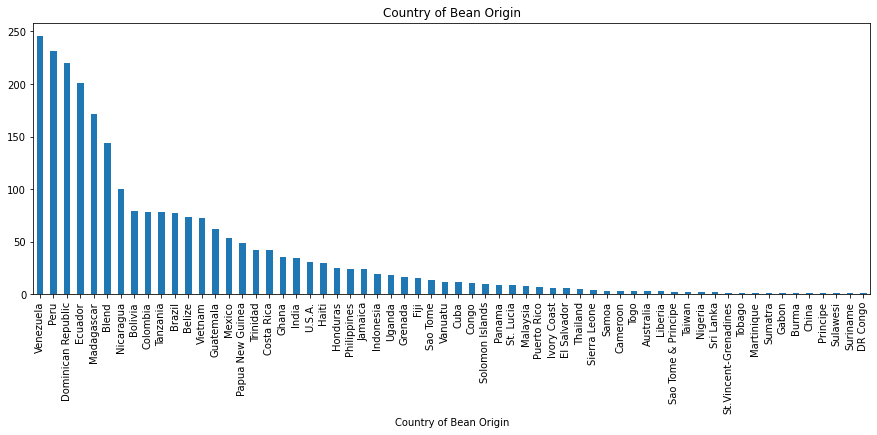

In [18]:
plt.figure(figsize=(15, 5))
feature = cat_features[2]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

                                                    count  percent
Specific Bean Origin or Bar Name                                  
Madagascar                                             52      2.1
Ecuador                                                38      1.6
Peru                                                   37      1.5
Dominican Republic                                     36      1.5
Chuao                                                  28      1.1
Kokoa Kamili                                           20      0.8
Venezuela                                              19      0.8
Papua New Guinea                                       17      0.7
Sambirano                                              17      0.7
Belize                                                 16      0.7
Ucayali                                                15      0.6
Ocumare                                                15      0.6
Oko Caribe                                             15     

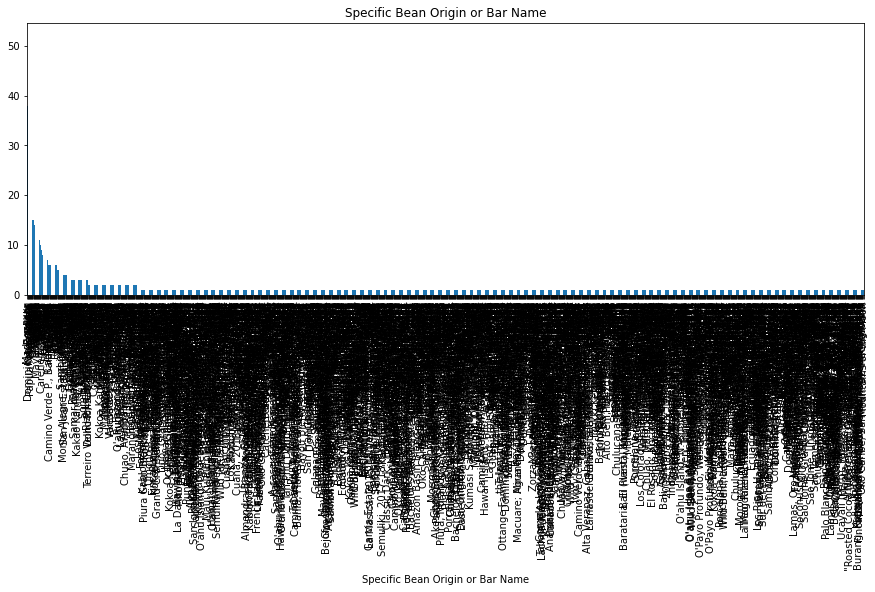

In [19]:
plt.figure(figsize=(15, 5))
feature = cat_features[3]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

               count  percent
Cocoa Percent                
70%             1014     41.5
75%              307     12.6
72%              287     11.7
80%               85      3.5
65%               82      3.4
68%               70      2.9
74%               67      2.7
73%               66      2.7
60%               44      1.8
71%               43      1.8
77%               41      1.7
85%               38      1.6
76%               35      1.4
67%               34      1.4
64%               31      1.3
66%               27      1.1
78%               21      0.9
82%               17      0.7
62%               16      0.7
55%               15      0.6
69%               13      0.5
63%               12      0.5
58%                8      0.3
90%                8      0.3
88%                7      0.3
100%               7      0.3
61%                7      0.3
81%                6      0.2
83%                5      0.2
72.5%              4      0.2
84%                4      0.2
91%       

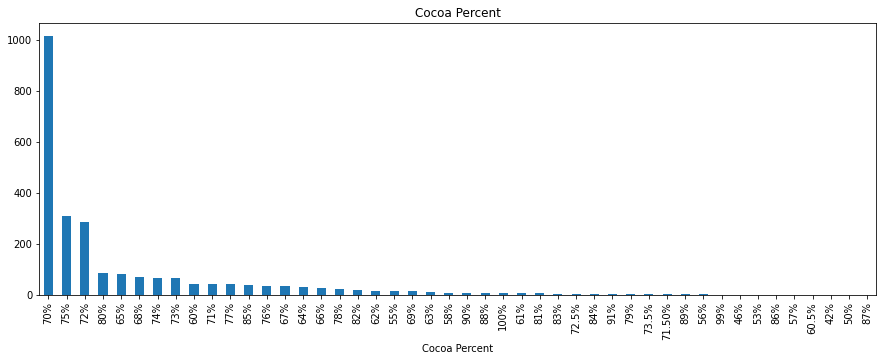

In [20]:
plt.figure(figsize=(15, 5))
feature = cat_features[4]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

                count  percent
Ingredients                   
3- B,S,C          999     40.9
2- B,S            718     29.4
4- B,S,C,L        286     11.7
5- B,S,C,V,L      184      7.5
4- B,S,C,V        141      5.8
2- B,S*            31      1.3
4- B,S*,C,Sa       20      0.8
3- B,S*,C          12      0.5
3- B,S,L            8      0.3
4- B,S*,C,V         7      0.3
1- B                6      0.2
5-B,S,C,V,Sa        6      0.2
4- B,S,V,L          5      0.2
4- B,S,C,Sa         5      0.2
6-B,S,C,V,L,Sa      4      0.2
3- B,S,V            3      0.1
4- B,S*,V,L         3      0.1
4- B,S*,C,L         2      0.1
3- B,S*,Sa          1      0.0
2- B,C              1      0.0
5- B,S,C,L,Sa       1      0.0


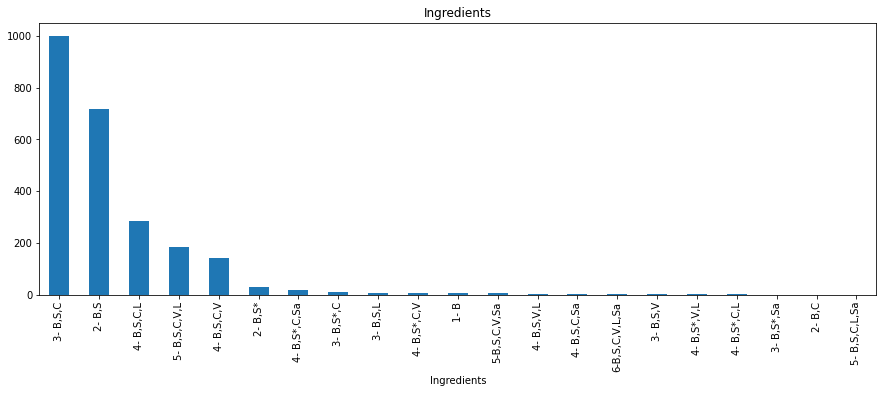

In [21]:
plt.figure(figsize=(15, 5))
feature = cat_features[5]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

                                count  percent
Most Memorable Characteristics                
spicy, cocoa                        4      0.2
creamy, nutty, cocoa                4      0.2
cherry, rich choco                  3      0.1
sandy, sweet, cocoa                 3      0.1
sweet, vanilla, cocoa               3      0.1
...                               ...      ...
coarse, woody, roasty               1      0.0
brownine, nutty                     1      0.0
earthy, floral, cocoa               1      0.0
simple, mild cocoa, fruit           1      0.0
muted, roasty, accessible           1      0.0

[2403 rows x 2 columns]


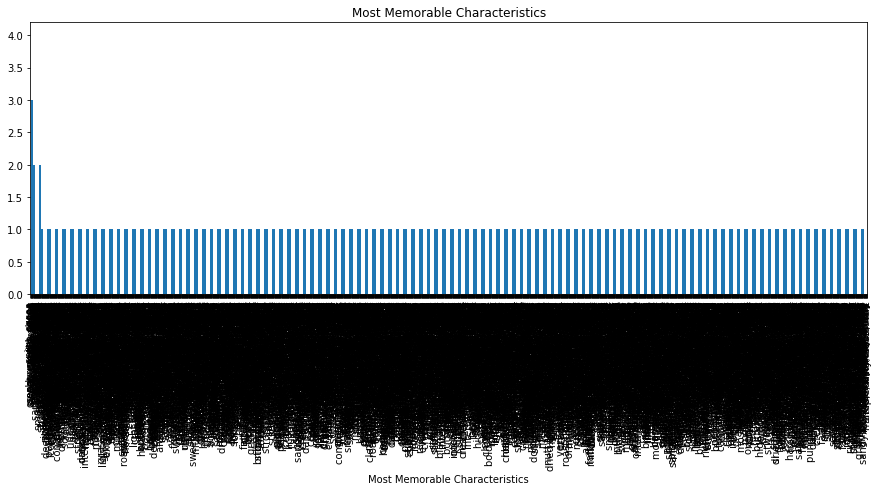

In [22]:
plt.figure(figsize=(15, 5))
feature = cat_features[6]
count = chocolate[feature].value_counts()
percent = 100*chocolate[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature, );

# Feature Engineering

In [23]:
chocolate = chocolate.drop(['Review Date'], axis=1)

In [24]:
def assign_continent_codes_to_country_location(country):
    asia = ['Japan', 'Vietnam', 'Singapore', 'Taiwan', 'Israel', 'South Korea', 'Malaysia', 'Philippines', 'Thailand', 'Indonesia', 'India']
    america = ['U.S.A.', 'Canada', 'Mexico', 'Ecuador', 'Venezuela', 'Colombia', 'Brazil', 'Peru', 'Guatemala', 'Nicaragua', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Honduras', 'Puerto Rico', 'St. Lucia', 'St. Vincent-Grenadines', 'Martinique', 'Grenada', 'St.Vincent-Grenadines', 'Suriname']
    europe = ['France', 'U.K.', 'Italy', 'Belgium', 'Switzerland', 'Germany', 'Spain', 'Denmark', 'Austria', 'Hungary', 'Netherlands', 'Lithuania', 'Poland', 'Sweden', 'Ireland', 'Scotland', 'Portugal', 'Norway', 'Finland', 'Iceland', 'Czech Republic', 'Russia']
    oceania = ['Australia', 'New Zealand', 'Fiji', 'Vanuatu']
    africa = ['South Africa', 'Sao Tome & Principe', 'Ghana']

    if country in asia:
        return 0
    elif country in america:
        return 1
    elif country in europe:
        return 2
    elif country in oceania:
        return 3
    elif country in africa:
        return 4
    else:
        return 5  # For another countries in the list

In [25]:
chocolate['Company Location'] = chocolate['Company Location'].apply(assign_continent_codes_to_country_location)

In [26]:
chocolate['Company Location'].value_counts()

Company Location
1    1518
2     690
0      99
3      85
5      42
4       9
Name: count, dtype: int64

In [27]:
chocolate['Cocoa Percent'] = chocolate['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

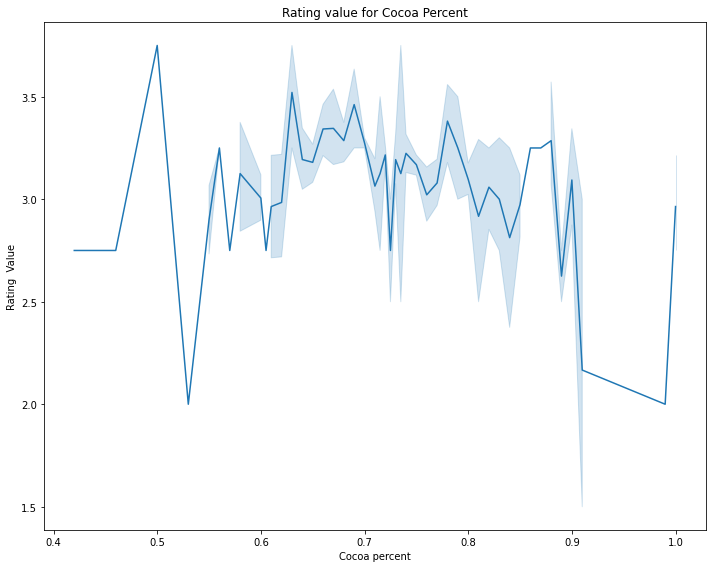

In [28]:
plt.figure(figsize=(10, 8))
sns.lineplot(x="Cocoa Percent", y="Rating",data=chocolate)
plt.title('Rating value for Cocoa Percent')
plt.xlabel('Cocoa percent')
plt.ylabel('Rating  Value')
plt.tight_layout()
plt.show();

In [29]:
def assign_continent_codes_to_country_of_begin_origin(country):
    asia = ['Vietnam', 'Indonesia', 'Papua New Guinea', 'Philippines', 'India', 'Sri Lanka', 'Malaysia', 'Thailand', 'Taiwan']
    america = ['Venezuela', 'Peru', 'Dominican Republic', 'Ecuador', 'Nicaragua', 'Bolivia', 'Colombia', 'Brazil', 'Belize', 'Guatemala', 'Mexico', 'Costa Rica', 'U.S.A.', 'Haiti', 'Honduras', 'Jamaica', 'Grenada', 'Cuba', 'Panama', 'St. Lucia', 'Puerto Rico', 'El Salvador', 'Trinidad', 'Ivory Coast', 'Togo', 'Sao Tome', 'Tobago', 'Principe', 'Suriname']
    africa = ['Madagascar', 'Cameroon', 'Nigeria', 'Ghana', 'Gabon', 'Ivory Coast', 'Sierra Leone', 'Congo', 'Liberia', 'Sao Tome & Principe']
    europe = ['Blend']
    oceania = ['Fiji', 'Vanuatu', 'Solomon Islands', 'Australia', 'New Zealand']

    if country in asia:
        return 0
    elif country in america:
        return 1
    elif country in europe:
        return 2
    elif country in oceania:
        return 3
    elif country in africa:
        return 4
    else:
        return 5  # For countries not covered in the list

In [30]:
chocolate['Country of Bean Origin'] = chocolate['Country of Bean Origin'].apply(assign_continent_codes_to_country_of_begin_origin)
chocolate.head()

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,5150,1,5,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,5150,1,1,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
2,5150,1,4,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
3,5150,1,3,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,5150,1,1,"Sur del Lago, batch 1",0.72,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [31]:
!pip install category_encoders

In [32]:
from category_encoders import TargetEncoder

In [33]:
encoder=TargetEncoder()
,
chocolate["Company (Manufacturer)"]=encoder.fit_transform(chocolate["Company (Manufacturer)"],chocolate["Rating"])
chocolate["Specific Bean Origin or Bar Name"]=encoder.fit_transform(chocolate["Specific Bean Origin or Bar Name"],chocolate["Rating"])
chocolate["Ingredients"]=encoder.fit_transform(chocolate["Ingredients"],chocolate["Rating"])
chocolate["Most Memorable Characteristics"]=encoder.fit_transform(chocolate["Most Memorable Characteristics"],chocolate["Rating"])

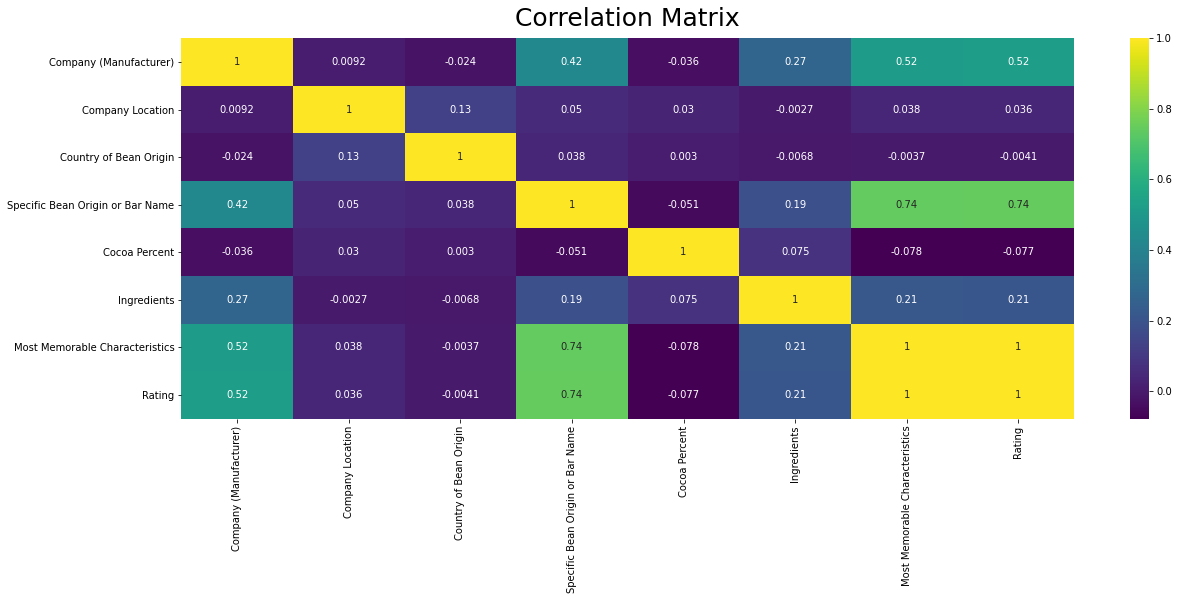

In [34]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(chocolate.corr(),cmap='viridis',annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':25}, pad=12);

## Finding outliers, Removing inconsistence records and delimit outliers

In [35]:
chocolate.head()

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,3.233935,1,5,3.215283,0.76,3.278529,3.215283,3.25
1,3.233935,1,1,3.247810,0.76,3.278529,3.247810,3.50
2,3.233935,1,4,3.280337,0.76,3.278529,3.280337,3.75
3,3.233935,1,3,3.182756,0.68,3.278529,3.182756,3.00
4,3.233935,1,1,3.182756,0.72,3.278529,3.182756,3.00


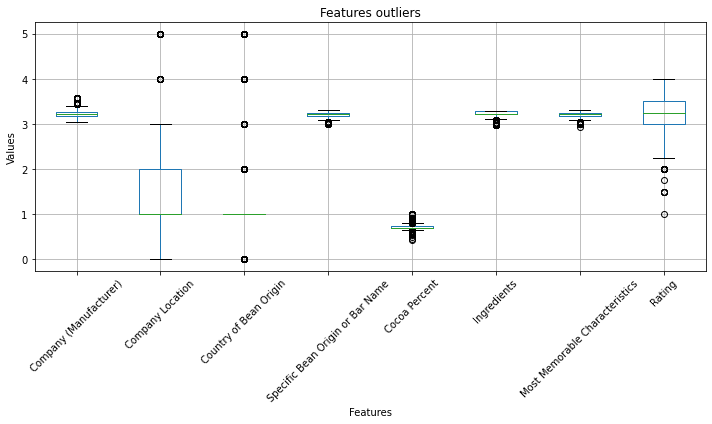

In [36]:
# A visualization to see the outliers in data
plt.figure(figsize=(10, 6))
chocolate.boxplot(rot=45)
plt.title('Features outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show();

In [37]:
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

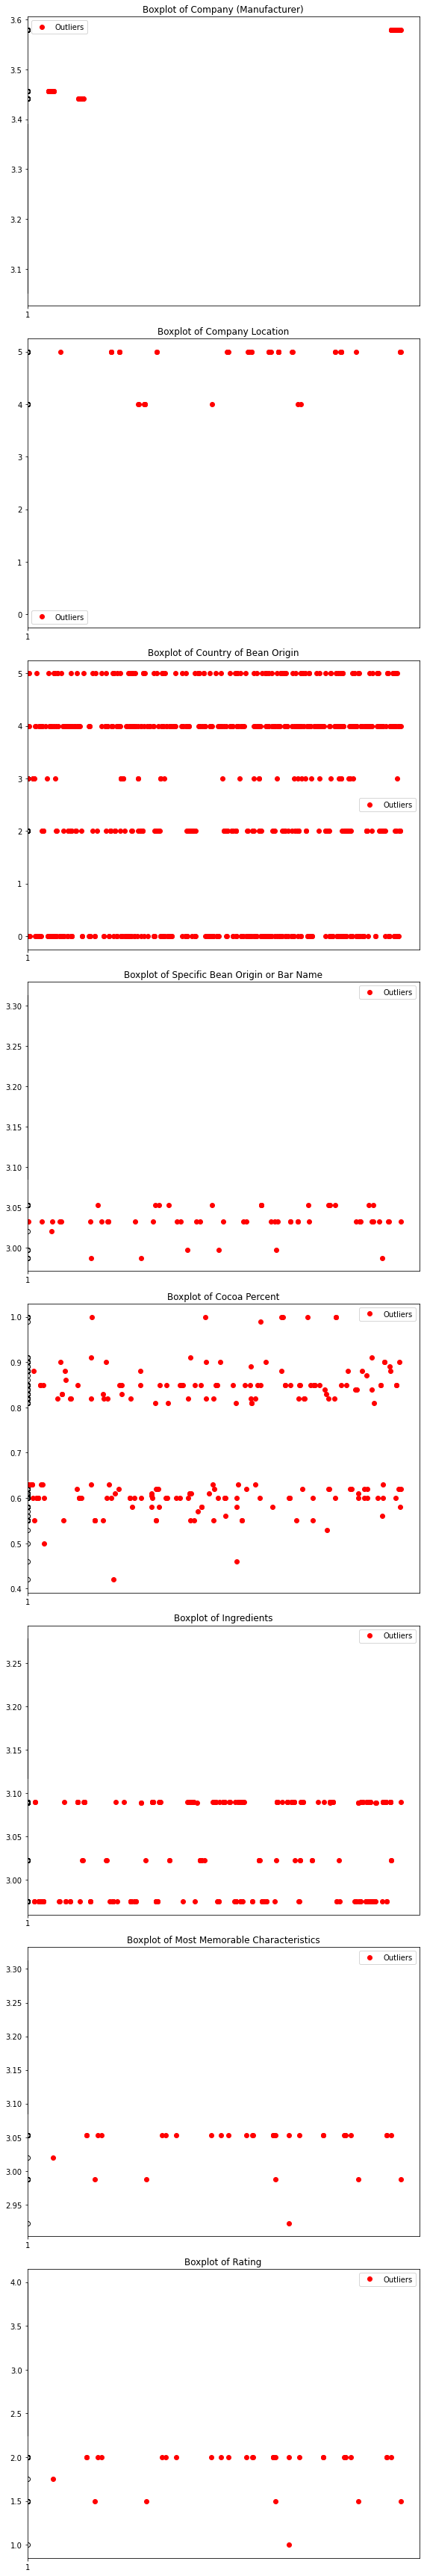

In [38]:
fig, axs = plt.subplots(nrows=len(chocolate.columns), figsize=(8, 6 * len(chocolate.columns)))
# Iterate through the columns and create a chart for each one
for i, columna in enumerate(chocolate.columns):
    axs[i].boxplot(chocolate[columna])
    axs[i].set_title(f'Boxplot of {columna}')
    # Detect and highlight outliers
    outliers = detect_outliers(chocolate[columna])
    axs[i].plot(np.where(outliers)[0] + 1, chocolate[columna][outliers], 'ro', label='Outliers')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [39]:
def delimit_variables(df):
    percentiles = df.select_dtypes(include=np.float64).quantile([0.01, 0.95])
    
    def delimit(col):
        if col.dtype == np.float64:
            return col.clip(lower=percentiles.loc[0.01, col.name], upper=percentiles.loc[0.95, col.name])
        else:
            return col
    
    return df.apply(delimit)

In [40]:
chocolate = delimit_variables(chocolate)

In [41]:
chocolate.shape

(2443, 8)

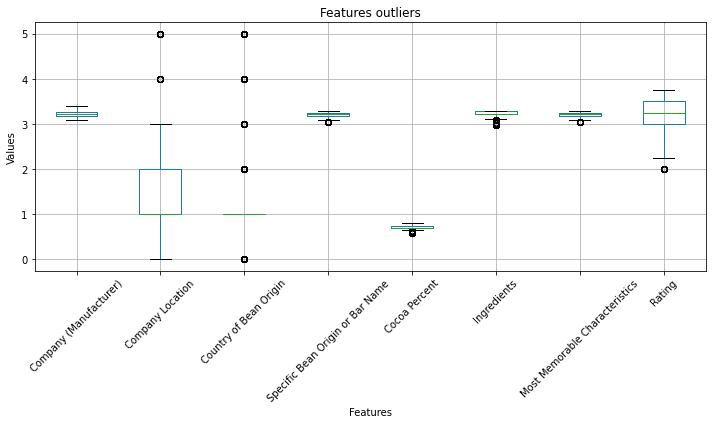

In [42]:
# A visualization to see the outliers in data
plt.figure(figsize=(10, 6))
chocolate.boxplot(rot=45)
plt.title('Features outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show();

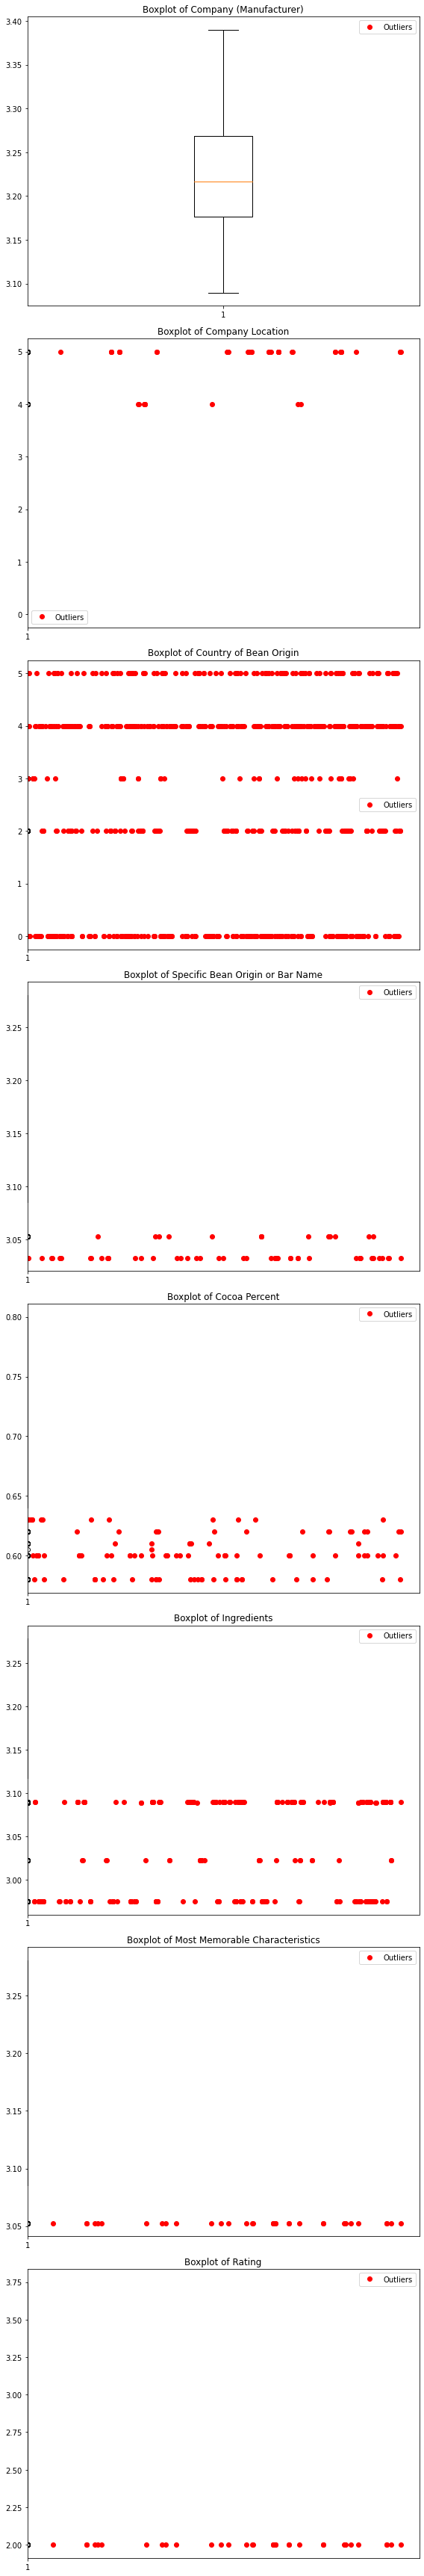

In [43]:
fig, axs = plt.subplots(nrows=len(chocolate.columns), figsize=(8, 6 * len(chocolate.columns)))
# Iterate through the columns and create a chart for each one
for i, columna in enumerate(chocolate.columns):
    axs[i].boxplot(chocolate[columna])
    axs[i].set_title(f'Boxplot of {columna}')
    # Detect and highlight outliers
    outliers = detect_outliers(chocolate[columna])
    axs[i].plot(np.where(outliers)[0] + 1, chocolate[columna][outliers], 'ro', label='Outliers')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Slicing training and test features

In [44]:
X = chocolate.drop(["Rating"], axis=1)    # independent variables
y = chocolate["Rating"]   #Objective or dependent target

In [45]:
X.shape

(2443, 7)

In [46]:
y.head()

0    3.25
1    3.50
2    3.75
3    3.00
4    3.00
Name: Rating, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

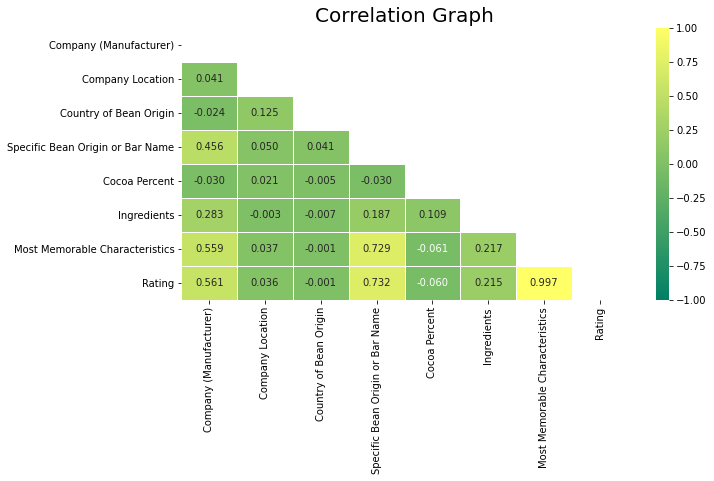

In [48]:
mask = np.triu(np.ones_like(chocolate.corr(), dtype=bool))
plt.figure(figsize=(10, 5))
plt.title("Correlation Graph", size=20)
sns.heatmap(chocolate.corr(), annot=True, fmt=".3f",
            vmin=-1, vmax=1, linewidth=1,
            center=0, mask=mask, cmap="summer")
plt.show();

In [49]:
print("Original Data",X.shape)
print("Data for Train",X_train.shape)
print("Data for Test",X_test.shape)
print(y_train.shape)
print(y_test.shape)

Original Data (2443, 7)
Data for Train (1954, 7)
Data for Test (489, 7)
(1954,)
(489,)


In [50]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#scaling the training set
X_train = std.fit_transform(X_train)
#scaling the test set
X_test = std.transform (X_test)

# Modeling

## 1. XGBoost

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
# Import XGBRegressor
from xgboost import XGBRegressor
# Calling the objetct
xgb = XGBRegressor()
# Training the model
xgb.fit(X_train, y_train)
# making the predictions
y_pred_xgb = xgb.predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_xgb = xgb.predict(X_train)

In [52]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_xgb)}')

Root Mean Squared Error: 0.04686015901427565
Coeficiente de determinación: 0.9854954864802028


### 1.1 Tuning Hyperparameters for XGBoost

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid_for_XGBoost = {
    'n_estimators': [10, 20, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'alpha': [0, 0.1, 0.2]  # Regularización L1
}

In [54]:
grid_search_for_XGBoost = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid_for_XGBoost, 
                           scoring='neg_mean_squared_error', cv=5)

In [55]:
grid_search_for_XGBoost.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'alpha': [0, 0.1, 0.2], 'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 4],
                         'n_estimators': [10, 20, 50],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [56]:
best_params_to_XGBoost = grid_search_for_XGBoost.best_params_
best_params_to_XGBoost

{'alpha': 0,
 'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 50,
 'subsample': 0.8}

In [57]:
best_xgb = XGBRegressor(**best_params_to_XGBoost)
best_xgb.fit(X_train, y_train)
# making the predictions
y_pred_xgb = best_xgb.predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_xgb = best_xgb.predict(X_train)

In [58]:
#Valor real valor pronóstico
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_xgb)}')

Root Mean Squared Error: 0.0438449159084299
Coeficiente de determinación: 0.9873020347525691


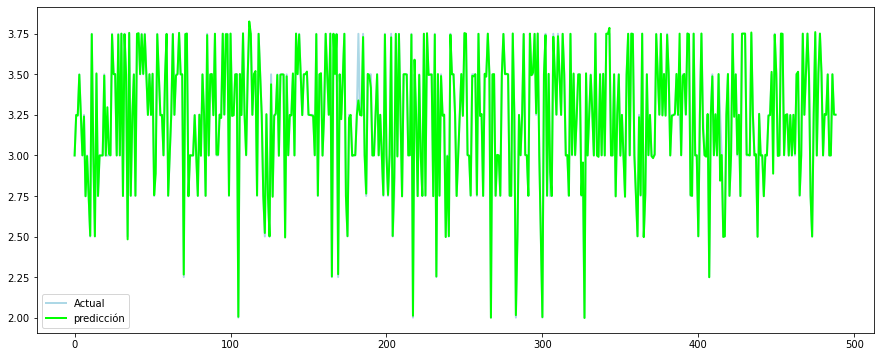

In [59]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_xgb, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 2. Random Forest

In [60]:
# build the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Loading the function 
rf = RandomForestRegressor(n_estimators=10,  
                           max_depth=5, 
                           min_samples_split=10,
                           min_samples_leaf=4)# 100 trees for default
# Training the model
rf.fit(X_train, y_train)
# making the predictions
y_pred_rf = rf.predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_rf = rf.predict(X_train)

In [61]:
#Valor real valor pronóstico
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_rf)}')

Root Mean Squared Error: 0.037991379442300126
Coeficiente de determinación: 0.9904662057136254


### 2.1 Tuning Hyperparameters for XGBoost

In [62]:
param_grid_for_rf = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 5, 8 , 12],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 5]
}

In [63]:
from sklearn.metrics import make_scorer, mean_squared_error
# Define una función de puntuación personalizada para el RMSE
def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)
rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

In [64]:
grid_search_for_rf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid_for_rf, 
                           scoring=rmse_scorer, 
                           cv=5)

In [65]:
grid_search_for_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, min_samples_leaf=4,
                                             min_samples_split=10,
                                             n_estimators=10),
             param_grid={'max_depth': [3, 5, 8, 12],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]},
             scoring=make_scorer(rmse_score, greater_is_better=False))

In [66]:
best_params_to_rf = grid_search_for_rf.best_params_
if 'alpha' in best_params_to_rf:
    del best_params_to_rf['alpha']
best_params_to_rf = grid_search_for_rf.best_params_
best_params_to_rf

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [67]:
best_rf = RandomForestRegressor(**best_params_to_rf)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, n_estimators=20)

In [68]:
y_pred_rf = best_rf.predict(X_test)
y_train_rf = best_rf.predict(X_train)

In [69]:
#Valor real valor pronóstico
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_rf)}')

Root Mean Squared Error: 0.04053641296236349
Coeficiente de determinación: 0.989146088340534


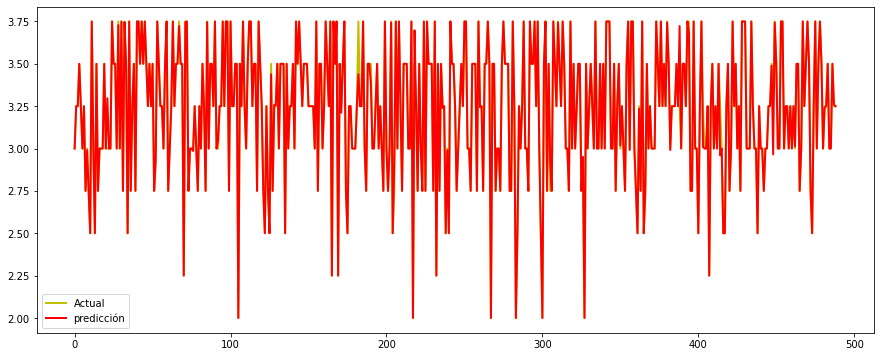

In [70]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="y", label="Actual", linewidth=2)
plt.plot(y_pred_rf, c="r", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 3. LightGBM

In [71]:
# build the lightgbm model
import lightgbm as lgb
from lightgbm import LGBMRegressor
lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)
# predict the results
y_pred_lgbm=lgbm.fit(X_train, y_train).predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_lgbm = lgbm.fit(X_train, y_train).predict(X_train)

In [72]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_lgbm)}')

Root Mean Squared Error: 0.0391864360010967
Coeficiente de determinación: 0.9898569822906165


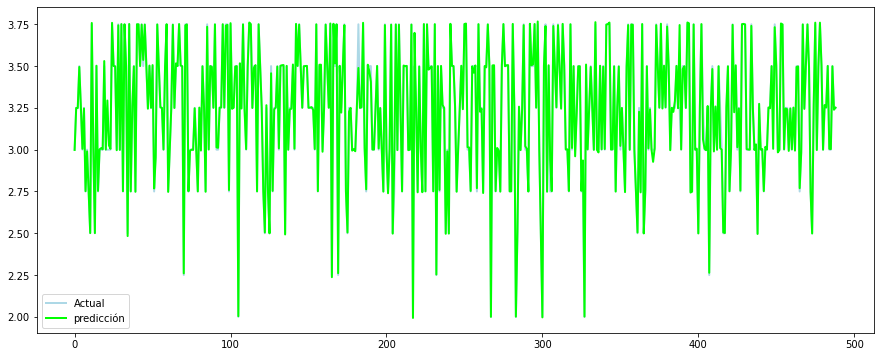

In [73]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_lgbm, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### 3.1 Tuning Hyperparameters for LigthGBM

In [74]:
param_grid_for_lgbm = {
    'n_estimators': [10, 20, 30, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [75]:
grid_search_for_lgbm = GridSearchCV(estimator=lgbm, 
                           param_grid=param_grid_for_lgbm, 
                           scoring='neg_mean_squared_error', 
                           cv=5)

In [76]:
grid_search_for_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [10, 20, 30, 50],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [77]:
best_params_to_lgbm = grid_search_for_lgbm.best_params_
best_params_to_lgbm

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_samples': 10,
 'n_estimators': 50,
 'subsample': 0.8}

In [78]:
best_lgbm = lgb.LGBMRegressor(**best_params_to_lgbm)
best_lgbm.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.2, max_depth=4, min_child_samples=10,
              n_estimators=50, subsample=0.8)

In [79]:
y_pred_lgbm = best_lgbm.predict(X_test)
y_train_lgbm = best_lgbm.predict(X_train)

In [80]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_rf)}')

Root Mean Squared Error: 0.04053641296236349
Coeficiente de determinación: 0.989146088340534


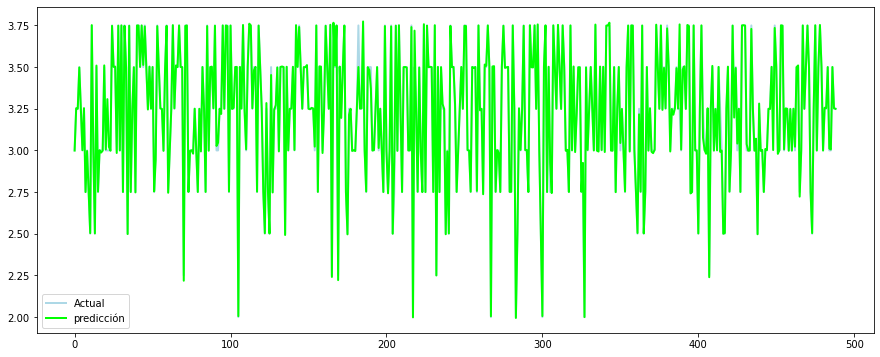

In [81]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_lgbm, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 4. Support Vector Machine

In [82]:
#Calling the object
from sklearn.svm import SVR
svm = SVR()
# Training our model
svm.fit(X_train, y_train)
# making the predictions
y_pred_svm = svm.fit(X_train, y_train).predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_svm = svm.fit(X_train, y_train).predict(X_train)

In [83]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_svm)}')

Root Mean Squared Error: 0.07046626522347978
Coeficiente de determinación: 0.9672011845323834


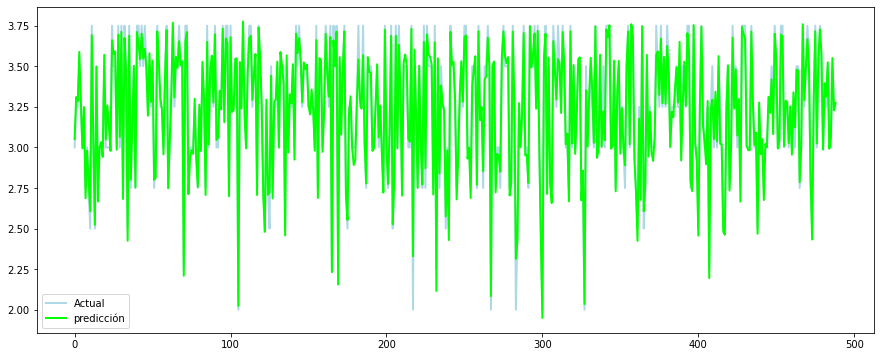

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_svm, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### 4.1 Tuning Hyperparameters for Support Vector Machine

In [85]:
param_grid_for_svm = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'epsilon': [0.1, 0.2, 0.3]
}

In [86]:
grid_search_for_svm = GridSearchCV(estimator=svm, 
                           param_grid=param_grid_for_svm, 
                           scoring='neg_mean_squared_error', 
                           cv=5)

In [87]:
grid_search_for_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1.0, 10.0], 'epsilon': [0.1, 0.2, 0.3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [88]:
best_params_to_svm = grid_search_for_svm.best_params_
best_params_to_svm

{'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}

In [89]:
best_svm = SVR(**best_params_to_svm)
best_svm.fit(X_train, y_train)

SVR(C=0.1, kernel='linear')

In [90]:
y_pred_svm = best_svm.predict(X_test)
y_train_svm = best_svm.predict(X_train)

In [91]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_svm)}')

Root Mean Squared Error: 0.0439444318324329
Coeficiente de determinación: 0.9872443275458211


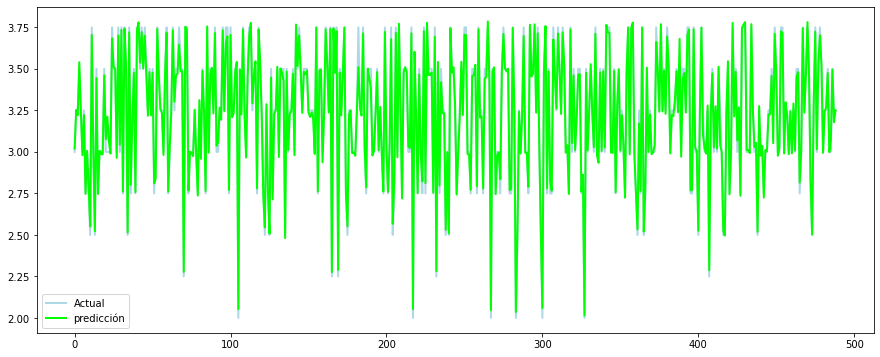

In [92]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_svm, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

## 5. GradientBoosting

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
# Create and train the Gradient Boosting Regressor model
gboosting = GradientBoostingRegressor(n_estimators=50,
                                      learning_rate=0.1,
                                      max_depth=4,
                                      min_samples_split=10,
                                      min_samples_leaf=4,
                                      subsample=0.8,
                                      random_state=42)
gboosting.fit(X_train, y_train)
# predict the results
y_pred_gboosting=gboosting.fit(X_train, y_train).predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_gboosting = gboosting.fit(X_train, y_train).predict(X_train)

In [94]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_gboosting)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_gboosting)}')

Root Mean Squared Error: 0.038465074567732314
Coeficiente de determinación: 0.9902269795262957


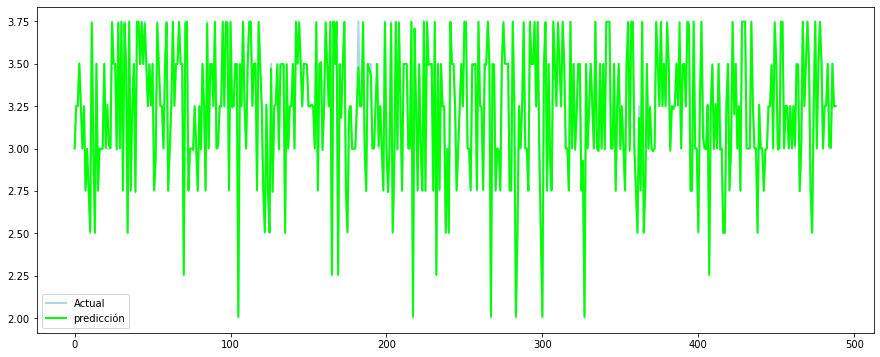

In [95]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_gboosting, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### 5.1 Tuning Hyperparameters for Support Vector Machine

In [96]:
param_grid_for_gboosting = {
    'n_estimators': [10, 20, 30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [2, 5, 3, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [97]:
grid_search_for_gboosting = GridSearchCV(estimator=gboosting, 
                           param_grid=param_grid_for_gboosting, 
                           scoring='neg_mean_squared_error', 
                           cv=5)

In [98]:
grid_search_for_gboosting.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=4,
                                                 min_samples_leaf=4,
                                                 min_samples_split=10,
                                                 n_estimators=50,
                                                 random_state=42,
                                                 subsample=0.8),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 3, 10],
                         'n_estimators': [10, 20, 30, 50, 100]},
             scoring='neg_mean_squared_error')

In [99]:
best_params_to_gboosting = grid_search_for_gboosting.best_params_
best_params_to_gboosting

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [100]:
best_gboosting = GradientBoostingRegressor(**best_params_to_gboosting)
best_gboosting.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=50)

In [101]:
y_pred_gboosting = best_gboosting.predict(X_test)
y_train_gboosting = best_gboosting.predict(X_train)

In [102]:
#Valor real valor pronóstico
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_gboosting)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_gboosting)}')

Root Mean Squared Error: 0.04506302209536847
Coeficiente de determinación: 0.9865866802117592


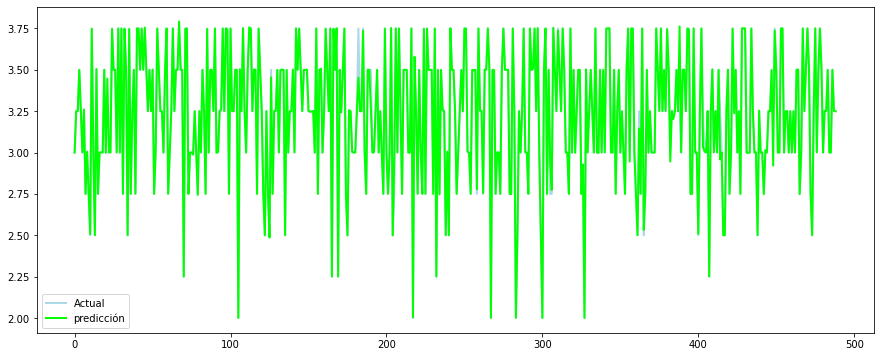

In [103]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_gboosting, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

# 6. HistGradientBoosting

In [104]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train, y_train)
# predict the results
y_pred_hgb=hgb.fit(X_train, y_train).predict(X_test)
# We make predictions of the model with the training set (Train)
y_train_hgb=hgb.fit(X_train, y_train).predict(X_train)

In [105]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_hgb)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_hgb)}')

Root Mean Squared Error: 0.03921893862322313
Coeficiente de determinación: 0.9898401493541503


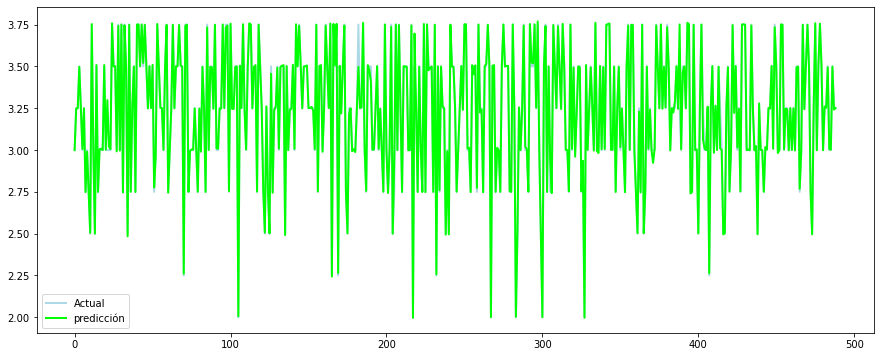

In [106]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_hgb, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

### 6.1 Tuning Hyperparameters for HistGradientBoosting

In [107]:
param_grid_for_hgb = {
    'learning_rate': [0.01, 0.1, 0.125, 0.2, 0.25],
    'max_depth': [3, 4, 5, 7],
    'min_samples_leaf': [1, 2, 4, 5]
}

In [108]:
grid_search_for_hgb = GridSearchCV(estimator=hgb, 
                                   param_grid=param_grid_for_hgb, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5)

In [109]:
grid_search_for_hgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.125, 0.2, 0.25],
                         'max_depth': [3, 4, 5, 7],
                         'min_samples_leaf': [1, 2, 4, 5]},
             scoring='neg_mean_squared_error')

In [110]:
best_params_to_hgb = grid_search_for_hgb.best_params_

In [111]:
best_hgb = HistGradientBoostingRegressor(**best_params_to_hgb)
best_hgb.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=4, min_samples_leaf=2)

In [112]:
y_pred_hgb = best_hgb.predict(X_test)
y_train_hgb = best_hgb.predict(X_train)

In [113]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_hgb)))
# The coefficient of determination: 1 is perfect prediction
print(f'Coeficiente de determinación: {r2_score(y_test, y_pred_hgb)}')

Root Mean Squared Error: 0.0431887665896815
Coeficiente de determinación: 0.9876792469199153


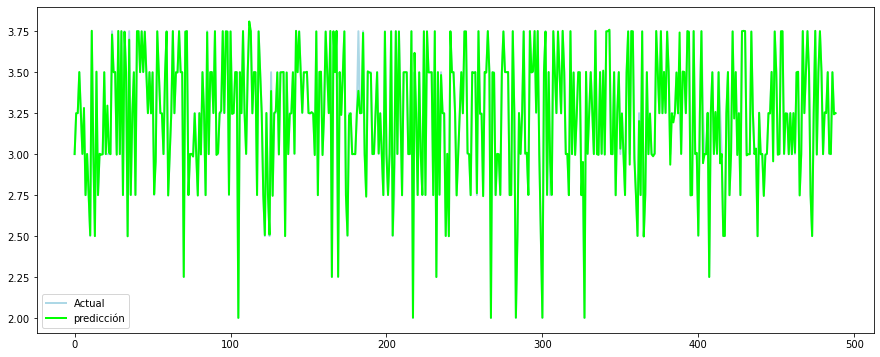

In [114]:
plt.figure(figsize=(15, 6))
plt.plot(list(y_test),  c="lightblue", label="Actual", linewidth=2)
plt.plot(y_pred_hgb, c="lime", label="predicción", linewidth=2)
plt.legend(loc='best')
plt.show();

# Model Comparison

In [115]:
model_comparison = pd.DataFrame({
    'Model': ["XGBoost","Random Forest","LightGBM","Support Vector Machine","GradientBoosting","HistGrandientBoosting"],
     "R2_train":[r2_score(y_train, y_train_xgb), r2_score(y_train, y_train_rf) ,r2_score(y_train, y_train_lgbm), 
                 r2_score(y_train, y_train_svm), r2_score(y_train, y_train_gboosting), r2_score(y_train, y_train_hgb)],
     "RMSE_train": [np.sqrt(mean_squared_error(y_train, y_train_xgb)), np.sqrt(mean_squared_error(y_train, y_train_rf)), 
                    np.sqrt(mean_squared_error(y_train, y_train_lgbm)), np.sqrt(mean_squared_error(y_train, y_train_svm)), 
                    np.sqrt(mean_squared_error(y_train, y_train_gboosting)), np.sqrt(mean_squared_error(y_train, y_train_hgb))],
      "R2_test":[r2_score(y_test, y_pred_xgb), r2_score(y_test, y_pred_rf) ,r2_score(y_test, y_pred_lgbm),
                 r2_score(y_test, y_pred_svm), r2_score(y_test, y_pred_gboosting), r2_score(y_test, y_pred_hgb)],
     "RMSE_test": [np.sqrt(mean_squared_error(y_test, y_pred_xgb)), np.sqrt(mean_squared_error(y_test, y_pred_rf)), 
                   np.sqrt(mean_squared_error(y_test, y_pred_lgbm)), np.sqrt(mean_squared_error(y_test, y_pred_svm)), 
                   np.sqrt(mean_squared_error(y_test, y_pred_gboosting)), np.sqrt(mean_squared_error(y_test, y_pred_hgb))]})

model_comparison.sort_values(by='RMSE_test', ascending=True)

,Model,R2_train,RMSE_train,R2_test,RMSE_test
2,LightGBM,0.997371,0.020907,0.989458,0.039950
1,Random Forest,0.997755,0.019321,0.989146,0.040536
5,HistGrandientBoosting,0.999242,0.011224,0.987679,0.043189
0,XGBoost,0.999290,0.010867,0.987302,0.043845
3,Support Vector Machine,0.989353,0.042076,0.987244,0.043944
4,GradientBoosting,0.999899,0.004091,0.986587,0.045063


In [116]:
y_pred_for_each_model = {
    "XGBoost": y_pred_xgb,
    "Random Forest": y_pred_rf,
    "Lightgbm": y_pred_lgbm,
    "Support Vector Machine": y_pred_svm,
    "GradientBoosting": y_pred_gboosting,
    "HisGradientBoosting": y_pred_hgb
}

In [117]:
num_models = len(y_pred_for_each_model)
num_cols = 3
num_rows = int(np.ceil(num_models / num_cols))

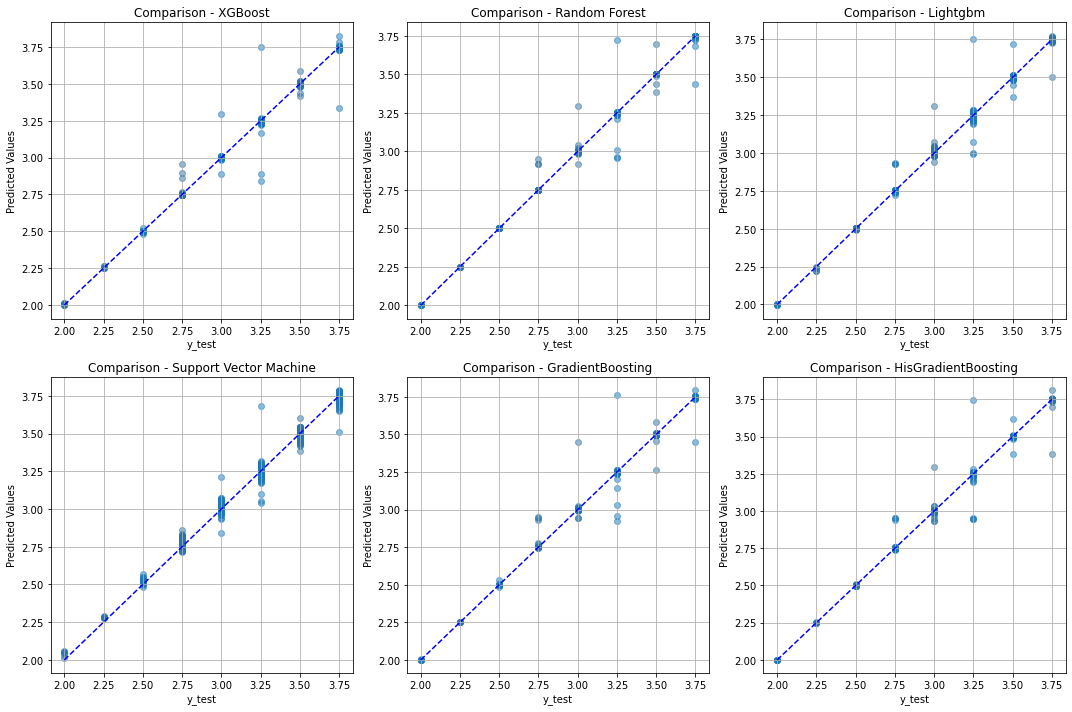

In [118]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, (model, pred) in enumerate(y_pred_for_each_model.items()):
    row = i // num_cols
    col = i % num_cols
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.scatter(y_test, pred, alpha=0.5)
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='blue')
    ax.set_xlabel('y_test')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Comparison - {model}')
    ax.grid(True)
# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show();

# Predicting Rating

In [119]:
best_model_to_predict = model_comparison.loc[model_comparison['R2_test'].idxmax()]
best_model_to_predict

Model         LightGBM
R2_train      0.997371
RMSE_train    0.020907
R2_test       0.989458
RMSE_test      0.03995
Name: 2, dtype: object

In [126]:
test = chocolate.sample()
test

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
2163,3.389789,1,1,3.280337,0.7,3.278529,3.280337,3.75


In [127]:
test= test.drop('Rating', axis=1)
test

,Company (Manufacturer),Company Location,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics
2163,3.389789,1,1,3.280337,0.7,3.278529,3.280337


In [128]:
lgbm.predict(test)

array([3.74935059])